# Initialization

In [1]:
import csv
import sklearn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
import statsmodels.api as sm
from sklearn import preprocessing, linear_model, model_selection, metrics

def df_summ(df):
    result = pd.DataFrame()
    
    result['Column'] = df.columns
    result['Type'] = df.dtypes.values
    result['Missing'] = df.isna().sum().values
    result['Missing (%)'] = result['Missing']*100/len(df)
    result['Unique'] = df.nunique().values
    result['Unique (%)'] = result['Unique']*100/len(df)
    
    return result

# Data Preparation
All of this section is commented because it was performed only once and no need to rerun it again to avoid loading/writing from the original loan dataset since it is very big

## Dataset filtering and preliminary feature selection

In [ ]:
# class LoanDataAnalysis:
#     def __init__(self, file_path):
#         self.file_path = file_path
#         self.df = pd.read_csv(file_path)

#     def display_info(self):
#         print(self.df.head())
#         numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
#         categorical_cols = self.df.select_dtypes(include=['object']).columns
#         print("\nNumber of numeric columns:", len(numeric_cols))
#         print("Number of categorical columns:", len(categorical_cols))

#     def filter_data(self, save_path=None):
#         self.df['issue_d'] = pd.to_datetime(self.df['issue_d'])
#         filtered_df = self.df[(self.df['issue_d'].dt.year >= 2016) &
#                               (self.df['loan_status'].isin(['Fully Paid', 'Charged Off']))]
#         if save_path:
#             filtered_df.to_csv(save_path, index=False)
#             print("Filtered dataset saved as '{}'".format(save_path))
#         return filtered_df

#     def split_data(self, filtered_df):
#         train_set = filtered_df[filtered_df['issue_d'].dt.year.isin([2016, 2017])]
#         test_set = filtered_df[filtered_df['issue_d'].dt.year == 2018]
#         return train_set, test_set

#     def select_columns(self, filtered_df, columns_to_keep):
#         selected_df = filtered_df[columns_to_keep]
#         return selected_df

#     def save_selected_data(self, selected_df, save_path):
#         selected_df.to_csv(save_path, index=False)
#         print("Selected dataset saved as '{}'".format(save_path))

#     def plot_missing_values_heatmap(self, df, title, save_path=None):
#         plt.figure(figsize=(10, 6))
#         sns.heatmap(df.isnull(), cmap='binary', cbar=False)
#         plt.yticks(rotation=0)
#         plt.title(title)
#         plt.xlabel('Columns')
#         plt.ylabel('Rows')
#         plt.tight_layout()
#         if save_path:
#             plt.savefig(save_path)
#         plt.show()


# # Example usage:
# file_path = "/Users/user/PycharmProjects/pythonProject2/loan.csv"
# save_filtered_path = "filtered_loan_data.csv"
# save_selected_path = "/Users/user/PycharmProjects/pythonProject2/selected_loan_data.csv"

# columns_to_keep = ['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'application_type',
#     'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
#     'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt',
#     'funded_amnt_inv', 'grade', 'home_ownership', 'il_util', 'initial_list_status', 'inq_last_12m',
#     'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'loan_amnt', 'loan_status', 'max_bal_bc',
#     'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog',
#     'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_sats', 'num_tl_120dpd_2m',
#     'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'open_act_il', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
#     'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term',
#     'tot_cur_bal', 'tot_hi_cred_lim', 'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim',
#     'verification_status', 'debt_settlement_flag']

# loan_analysis = LoanDataAnalysis(file_path)
# loan_analysis.display_info()
# filtered_data = loan_analysis.filter_data(save_path=save_filtered_path)
# train_set, test_set = loan_analysis.split_data(filtered_data)
# print("Number of instances in train_set:", len(train_set))
# print("Number of instances in test_set:", len(test_set))
# selected_data = loan_analysis.select_columns(filtered_data, columns_to_keep)
# loan_analysis.save_selected_data(selected_data, save_selected_path)

## Feature Transformation and Data Splitting

In [ ]:
# # Combining related but sparse features
# df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\selected_loan_data.csv")

# df.loc[df['application_type'] == "Joint App", "annual_inc"] = (df["annual_inc"] + df["annual_inc_joint"])/2
# df.loc[df['application_type'] == "Joint App", "dti"] = (df["dti"] + df["dti_joint"])/2

# df["mths_sin_rcnt_acct"] = np.min([df["mo_sin_old_il_acct"].values,
#                           df["mo_sin_old_rev_tl_op"].values,
#                           df["mo_sin_rcnt_rev_tl_op"].values,
#                           df["mo_sin_rcnt_tl"].values], axis = 0)


# # Converting datetime features into units of months

# df["last_credit_pull_d"] = pd.to_datetime(df["last_credit_pull_d"], format = "%b-%Y")
# df["issue_d"] = pd.to_datetime(df["issue_d"], format = "%Y-%m-%d")
# df["mths_sin_credit_pull"] = df["issue_d"].dt.to_period('M').astype("int64") - df["last_credit_pull_d"].dt.to_period('M').astype("int64")
# df.loc[df['mths_sin_credit_pull'] < 0, "mths_sin_credit_pull"] = 0

# df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format = "%b-%Y")
# df["mths_sin_earliest_cr"] = df["issue_d"].dt.to_period('M').astype("int64") - df["earliest_cr_line"].dt.to_period('M').astype("int64")


# # Dropping irrelevant columns

# df.drop(columns = ["last_pymnt_amnt",
#                    "last_pymnt_d",
#                    "total_pymnt",
#                    "total_pymnt_inv",
#                    'total_rec_prncp', 
#                    'total_rec_int',
#                    'total_rec_late_fee',
#                    "debt_settlement_flag",
#                    "collection_recovery_fee",
#                    "annual_inc_joint",
#                    "dti_joint",
#                    "inq_fi", 
#                    "inq_last_6mths",
#                    "mo_sin_old_il_acct", 
#                    "mo_sin_old_rev_tl_op",
#                    "mo_sin_rcnt_rev_tl_op",
#                    "mo_sin_rcnt_tl",
#                    "last_credit_pull_d",
#                    "earliest_cr_line",
#                    "mths_since_last_delinq",
#                    "mths_since_last_major_derog"
#                   ],
#         inplace = True
#        )

# # Split into train and test

# test = df.loc[df["issue_d"].dt.year >= 2018]
# train = df.loc[df["issue_d"].dt.year < 2018]

# print(train.shape)
# print(test.shape)

# #Check missing values in train dataset
# summary_df = df_summ(train)
# display(summary_df[summary_df["Missing (%)"] > 0])

## Recategorizing emp_title into 7 broader categories

In [ ]:
## Recategorize emp_title into 7 broader categories

# categories = {"Education": 
#               [
#                   "teacher", "lecture", "professor", "trainer", "educa", "training", "postdoctor", "research",
#                             "scien", "bio", "physic", "math", "faculty", "chemist", "dean"
#               ],
#               "Corporate":
#               [
#                   "manag", "director", "president", "CEO", "exec", "general", "supervisor", "head", "principal", "super",
#                   "chief", "directer", "partner", "VP", "CFO", "GM", "team lead","data", "engineer", "programmer",
#                   "technology", "analyst", "IT", "tech", "dev", "web", "account", "consultant", "attorney", "lawyer", "legal",
#                   "sales", "marketing", "law", "human", "HR", "human resource", "tax", "auditor", "recruit", "office", "asso",
#                   "compliance", "advis", "custod", "financ", "estimator", "deal", "planner", "CPA", "CFA", "special", "bank",
#                   "trade", "trading", "mgr", "code"
#               ],
#               "Business Owner":
#               [
#                   "owner", "self", "investor", "founder"
#               ],
#               "Healthcare-Civil":
#               [
#                   "nurs", "doctor", "health", "pharma", "RN", "LPN", "LVN", "CNA", "clinic", "care", "drug", "counsel",
#                   "therap", "medic", "dent", "psyc", "police", "sergeant", "lieutenant", "detective", "deputy", "sheriff",
#                   "fire", "inspect", "investigat", "captain", "EMT", "paraprof", "phlebotom", "soldier", "army", "navy",
#                   "troop", "judge", "minist", "vet", "patrol"
#               ],
#               "Admin-Operator":
#               [
#                   "driver", "operator", "controller", "electrician", "server", "mechanic", "operation", "technician",
#                   "foreman", "forman", "coordinator", "service", "maintenance", "door", "plumber", "labor", "worker",
#                   "agent", "weld", "machini", "lead", "carpenter", "dispatch", "warehouse", "courier", "assembl", "install",
#                   "cler", "produc", "carrier", "handler", "process", "logis", "ship", "post", "port", "util", "contractor",
#                   "keep", "admin", "staff", "support", "administration", "assistant", "administrative", "real", "secre",
#                   "cash", "recept", "teller", "broker", "buyer", "pay", "merchan", "adjus", "purchas", "regist", "sched",
#                   "conduct", "lineman", "instruct", "packer", "receiver", "desk", "bill", "clean", "load", "stocker",
#                   "pressman", "picker", "examiner", "manufactur", "drill"
#               ],
#               "Tourism-Entertainment":
#               [
#                   "art", "design", "content", "music", "cast", "paint", "styl", "libr", "pastor", "relig", "nun", "comm",
#                   "csr", "bartender", "cook", "chef", "pilot", "flight", "bake", "optic", "nanny", "baby", "help",
#                   "collect", "barista", "esthetic", "barber", "dress", "hair", "salon", "coach"
#               ],
#               "Others": []}

# def categorize_job(df):
#     result = []
#     for job in df["emp_title"]:
#         flag = 0
#         if flag == 0:
#             for i in categories.keys():
#                 if flag == 0 and i!="Others":
#                     for j in categories[i]:
#                         if flag == 0:
#                             if (str(j).lower() in str(job).lower()):
#                                 flag = 1
#                                 result.append(i)
#                                 break
#                 elif flag == 0 and i == "Others":
#                     flag = 1
#                     result.append(i)
#                     break
    
#     df["job_category"] = result
#     df.loc[(df["emp_title"] == "CTO") | (df["emp_title"] == "COO")| (df["emp_title"] == "CIO"), "job_category"] = "Corporate"
#     df.loc[(df["emp_title"].isna() == True ), "job_category"] = np.NaN
#     return df

# train = categorize_job(train)
# test = categorize_job(test)

# # Write the imputed DataFrame to a new CSV file
# train.to_csv("train.csv", index=False)
# test.to_csv("test.csv", index=False)

# Exploratory Data Analysis

## Missing values heatmap

In [ ]:
# loan_analysis.plot_missing_values_heatmap(loan_analysis.df, 'Missing Values Heatmap For Raw Data',
#                                           'missing_values_heatmap_raw.png')
# loan_analysis.plot_missing_values_heatmap(filtered_data, 'Missing Values Heatmap For Filtered Data',
#                                           'missing_values_heatmap_filtered.png')
# loan_analysis.plot_missing_values_heatmap(selected_data, 'Missing Values Heatmap For Selected Data',
#                                           'missing_values_heatmap_selected.png')

## Features Correlation with Loan Status

In [ ]:
# def load_data(file_path):
#     return pd.read_csv(file_path)
# 
# def filter_numeric_columns(df):
#     return df.select_dtypes(include=['int', 'float'])
# 
# def filter_categorical_columns(df):
#     return df.select_dtypes(include=['object'])
# 
# def compute_correlation_matrix(df):
#     return df.corr()
# 
# def plot_heatmap(correlation_matrix, output_filename=None):
#     plt.figure(figsize=(12, 12))
#     sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
#     plt.title('Correlation Heatmap')
#     if output_filename:
#         plt.savefig(output_filename)
#     plt.show()
# 
# def find_highly_correlated_variables(correlation_matrix, threshold=0.7):
#     highly_correlated_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)
#     return highly_correlated_pairs
# 
# def plot_highly_correlated_heatmap(correlation_matrix, highly_correlated_pairs, output_filename=None):
#     annot_kws = {"fontsize": 10, "color": 'black'}
#     plt.figure(figsize=(12, 12))
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=~highly_correlated_pairs, annot_kws=annot_kws)
#     plt.title('Correlation Heatmap (Highly Correlated Pairs)')
#     if output_filename:
#         plt.savefig(output_filename)
#     plt.show()
# 
# def visualize_relationship_categorical(df, column, loan_status_column='loan_status', output_filename=None):
#     counts = df.groupby([column, loan_status_column]).size().unstack(fill_value=0)
#     plt.figure(figsize=(10, 6))
#     counts.plot(kind='bar', stacked=True, color=['blue', 'red'])
#     plt.title(f'Relationship between {column} and {loan_status_column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.xticks(rotation=90)
#     plt.legend(title=loan_status_column)
#     plt.tight_layout()
#     if output_filename:
#         plt.savefig(output_filename)
#     plt.show()
# 
# def visualize_emp_length_relationship(df, loan_status_column='loan_status', output_filename=None):
#     plt.figure(figsize=(10, 6))
#     counts_emp = df.groupby(['emp_length', loan_status_column]).size().unstack(fill_value=0)
#     emp = counts_emp.reindex(['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])
#     emp.plot(kind='bar', stacked=True, color=['blue', 'red'])
#     plt.title(f'Relationship between emp_length and {loan_status_column}')
#     plt.xlabel('emp_length')
#     plt.ylabel('Count')
#     plt.xticks(rotation=90)
#     plt.legend(title=loan_status_column)
#     plt.tight_layout()
#     if output_filename:
#         plt.savefig(output_filename)
#     plt.show()
# 
# def visualize_relationship_numerical(df, column, loan_status_column='loan_status', output_filename=None):
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=loan_status_column, y=column, data=df, hue=loan_status_column, palette={'Fully Paid': 'blue', 'Charged Off': 'red'})
#     plt.title(f'Relationship between {column} and {loan_status_column}')
#     plt.xlabel(loan_status_column)
#     plt.ylabel(column)
#     plt.legend(title=loan_status_column)
#     plt.tight_layout()
#     if output_filename:
#         plt.savefig(output_filename)
#     plt.show()
# 
# def categorize_columns(df, loan_status_column='loan_status'):
#     variable_columns = [col for col in df.columns if col != loan_status_column]
#     categorical_columns = [col for col in variable_columns if df[col].dtype == 'object']
#     numeric_columns = [col for col in variable_columns if col not in categorical_columns]
#     return categorical_columns, numeric_columns
# 
# def main():
#     # Load data
#     df = load_data('train.csv')
# 
#     # Categorize columns as categorical or numeric
#     categorical_columns, numeric_columns = categorize_columns(df)
# 
#     # Filter numeric and categorical columns
#     numeric_df = df[numeric_columns]
#     categorical_df = df[categorical_columns]
# 
#     # Compute correlation matrix
#     correlation_matrix = compute_correlation_matrix(numeric_df)
# 
#     # Plot heatmap
#     plot_heatmap(correlation_matrix, 'correlation_heatmap.png')
# 
#     # Find highly correlated variables
#     highly_correlated_pairs = find_highly_correlated_variables(correlation_matrix)
# 
#     # Plot highly correlated heatmap
#     plot_highly_correlated_heatmap(correlation_matrix, highly_correlated_pairs, 'correlation_heatmap_highly_correlated.png')
# 
#     # Visualize relationship between categorical variables and loan status
#     for column in categorical_df.columns:
#         visualize_relationship_categorical(df, column, output_filename=f'{column}_grouped_bar_chart.png')
# 
#     # Visualize relationship between numerical variables and loan status
#     for column in numeric_df.columns:
#         visualize_relationship_numerical(df, column, output_filename=f'{column}_box_plot.png')
# 
#     # Visualize relationship between emp_length and loan status
#     visualize_emp_length_relationship(df, output_filename='emp_length_grouped_bar_chart.png')
# 
# main()

# Missing Values Imputation, Ordinal Encoding, and Feature Selection via Correlation Analysis

This section is done on the R program, please kindly check the ".R" file that returns "train_vs1.csv" and "test_vs1.csv"

# Information
This section is preserved for general information of the train set

In [2]:
train = pd.read_csv("./Data/train_vs1.csv")
test = pd.read_csv("./Data/test_vs1.csv")

In [3]:
num_var = train.select_dtypes(include=[np.number]).columns
cat_var = train.select_dtypes(include=[object, "datetime"]).columns

print("Number of numerical variable: {} variables".format(len(num_var)))
print("Number of categorical variable: {} variables".format(len(cat_var)))
print("Training set: {} variables with {} rows".format(train.shape[1], train.shape[0]))

train[num_var].describe()

Number of numerical variable: 37 variables
Number of categorical variable: 8 variables
Training set: 45 variables with 433599 rows


,loan_amnt,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal,collections_12_mths_ex_med,...,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bc_limit,total_il_high_credit_limit,mths_sin_rcnt_acct,mths_sin_credit_pull,mths_sin_earliest_cr,issue_month
count,433599.000000,433599.000000,433599.000000,433599.000000,4.335990e+05,433599.000000,433599.000000,433599.000000,4.335990e+05,433599.000000,...,433599.000000,433599.000000,433599.000000,433599.000000,4.335990e+05,4.335990e+05,433599.000000,433599.000000,433599.000000,433599.000000
mean,14444.773512,13.473746,11.793254,5.543832,8.002105e+04,18.543216,0.338449,0.257035,1.594266e+04,0.022113,...,0.091986,93.875969,0.158298,0.064410,2.251826e+04,4.526596e+04,7.402268,0.002717,195.809192,5.885768
std,9115.066337,5.292474,6.437473,3.903071,7.814461e+04,10.045419,0.923917,0.653500,2.314960e+04,0.168261,...,0.534835,9.100093,0.408063,0.435635,2.229637e+04,4.501057e+04,7.711629,0.052273,90.807568,3.438549
min,1000.000000,5.320000,1.000000,0.000000,2.400000e+03,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,37.000000,1.000000
25%,7200.000000,9.750000,7.000000,2.000000,4.900000e+04,12.010000,0.000000,0.000000,5.535000e+03,0.000000,...,0.000000,90.900000,0.000000,0.000000,8.200000e+03,1.650000e+04,3.000000,0.000000,135.000000,3.000000
50%,12000.000000,12.740000,11.000000,5.000000,6.800000e+04,17.930000,0.000000,0.000000,1.052400e+04,0.000000,...,0.000000,97.500000,0.000000,0.000000,1.590000e+04,3.445300e+04,5.000000,0.000000,177.000000,6.000000
75%,20000.000000,16.020000,15.000000,10.000000,9.500000e+04,24.530000,0.000000,0.000000,1.887900e+04,0.000000,...,0.000000,100.000000,0.000000,0.000000,2.920000e+04,6.065850e+04,9.000000,0.000000,242.000000,9.000000
max,40000.000000,30.990000,35.000000,10.000000,1.099920e+07,515.490000,29.000000,61.000000,1.696796e+06,12.000000,...,29.000000,100.000000,8.000000,61.000000,1.105500e+06,2.000000e+06,169.000000,2.000000,999.000000,12.000000


In [22]:
display(train[cat_var].describe())

,term,home_ownership,verification_status,loan_status,addr_state,initial_list_status,application_type,job_category
count,404291,404291,404291,404291,404291,404291,404291,404291
unique,2,5,3,2,50,2,2,7
top,36 months,MORTGAGE,Source Verified,Fully Paid,CA,w,Individual,Corporate
freq,311244,200515,172860,310783,57591,306433,389680,234276


In [23]:
for i in cat_var:
    print("The {} variable has {} unique category, which are:".format(i, len(train[i].unique())))
    print(train[i].value_counts(dropna = False), "\n")

The term variable has 2 unique category, which are:
term
36 months    311244
60 months     93047
Name: count, dtype: int64 

The home_ownership variable has 5 unique category, which are:
home_ownership
MORTGAGE    200515
RENT        157151
OWN          46400
ANY            223
NONE             2
Name: count, dtype: int64 

The verification_status variable has 3 unique category, which are:
verification_status
Source Verified    172860
Not Verified       121937
Verified           109494
Name: count, dtype: int64 

The loan_status variable has 2 unique category, which are:
loan_status
Fully Paid     310783
Charged Off     93508
Name: count, dtype: int64 

The addr_state variable has 50 unique category, which are:
addr_state
CA    57591
TX    34853
NY    31857
FL    29063
IL    15053
NJ    14038
PA    12990
OH    12937
GA    12877
NC    11487
VA    10779
MI    10433
AZ    10297
CO     9421
MA     9402
MD     9272
WA     8461
MN     7360
IN     7196
TN     6630
NV     6259
MO     6246
CT   

In [24]:
print(num_var)
print(cat_var)

Index(['loan_amnt', 'int_rate', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'pub_rec', 'revol_bal', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_cur_bal', 'open_act_il', 'il_util', 'max_bal_bc',
       'all_util', 'inq_last_12m', 'acc_open_past_24mths', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'total_bc_limit',
       'total_il_high_credit_limit', 'mths_sin_rcnt_acct',
       'mths_sin_credit_pull', 'mths_sin_earliest_cr', 'issue_month'],
      dtype='object')
Index(['term', 'home_ownership', 'verification_status', 'loan_status',
       'addr_state', 'initial_list_status', 'application_type',
       'job_category'],
      dtype='object')


# Model Building

## Logistic Regression

In [2]:
train = pd.read_csv("./Data/train_vs1.csv")
test = pd.read_csv("./Data/test_vs1.csv")

In [3]:
def transform_features(df, encoder, scaler, imba_sampler = None, train = True, feature_importance = False):
    df.dropna(inplace = True)
    df.drop_duplicates(inplace = True)
    
    # Defining X and Y
    X_train = df.drop(columns = ["loan_status"])
    if feature_importance:
        X_train.drop(columns = ["collections_12_mths_ex_med",
                                'application_type',
                                'acc_now_delinq',
                                'chargeoff_within_12_mths',
                                'delinq_amnt',
                                'num_tl_120dpd_2m',
                                'num_tl_30dpd',
                                'num_tl_90g_dpd_24m',
                                'pub_rec_bankruptcies',
                                'tax_liens',
                                'mths_sin_credit_pull'
                                ],
                     inplace = True)
    
    y_train = pd.DataFrame(df["loan_status"])
    num_var = X_train.select_dtypes(include=[np.number]).columns
    cat_var = X_train.select_dtypes(include=[object, "datetime"]).columns
        
    # Scaling numerical variables and encoding categorical variables
    if train:
        if imba_sampler:
            X_train, y_train = imba_sampler.fit_resample(X_train, y_train)
        scaler.fit(X_train[num_var])
        encoder.fit(X_train[cat_var])
    X_train[num_var] = scaler.transform(X_train[num_var])
    
    # Concatenating encoded categorical variables and dropping original categorical variables
    temp = encoder.transform(X_train[cat_var])
    temp = pd.DataFrame(temp.toarray(), columns = encoder.get_feature_names_out(cat_var))
    X_train.drop(columns = cat_var, inplace = True)
    X_train = pd.concat([X_train.reset_index(drop=True), temp.reset_index(drop=True)], axis = 1)
    
    # Encoding target
    y_train.loc[y_train['loan_status'] == 'Fully Paid', "loan_status"] = "0"
    y_train.loc[y_train['loan_status'] == 'Charged Off', "loan_status"] = "1"
    
    return X_train, y_train

### We use standard scaler instead of robust scaler

In [23]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")

X_train, y_train = transform_features(train, encoder, scaler)
X_test, y_test = transform_features(test, encoder, scaler, train = False)

### Vanilla Logistic Regression

In [24]:
model = sklearn.linear_model.LogisticRegression(penalty= None,
                                                random_state= 15, 
                                                solver = 'saga',
                                                max_iter = 10000, 
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc", "balanced_accuracy", "f1_weighted", "f1_macro"], 
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

In [25]:
cv_results

{'fit_time': array([136.90615392, 119.44687986,  89.86416101, 120.8246665 ,
        121.25628996, 116.92790174, 119.97071409, 125.87551522,
        129.81853771, 128.71305561]),
 'score_time': array([0.28571677, 0.24914455, 0.24718332, 0.25252986, 0.25058126,
        0.24604058, 0.24813271, 0.25344086, 0.2551055 , 0.24518824]),
 'estimator': [LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegress

### Lasso for feature selection first because our model failed to converge

In [26]:
model = sklearn.linear_model.LogisticRegression(penalty="l1",
                                                random_state=15,
                                                solver='saga',
                                                max_iter=10000,
                                                tol=5e-4,
                                                n_jobs=-1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

hyper_params = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}]

search_feature_cv_results = sklearn.model_selection.GridSearchCV(estimator=model,
                                                                 param_grid=hyper_params,
                                                                 refit="f1_macro",
                                                                 cv=skf,
                                                                 scoring=["roc_auc", "balanced_accuracy",
                                                                          "f1_macro"],
                                                                 return_train_score=True,
                                                                 n_jobs=-1,
                                                                 verbose=3
                                                                 )

search_feature_cv_results.fit(X_train.values, y_train.values.ravel())

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=15, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          penalty='l1', random_state=15,
                                          solver='saga', tol=0.0005),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             refit='f1_weighted', return_train_score=True,
             scoring=['roc_auc', 'balanced_accuracy', 'f1_weighted'],
             verbose=3)

In [34]:
search_feature_cv_results.best_params_['C']

10

In [28]:
pd.DataFrame(search_feature_cv_results.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,...,split2_train_f1_weighted,split3_train_f1_weighted,split4_train_f1_weighted,split5_train_f1_weighted,split6_train_f1_weighted,split7_train_f1_weighted,split8_train_f1_weighted,split9_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted
0,50.058560,6.106503,0.470589,0.016985,0.001,{'C': 0.001},0.706739,0.710942,0.710097,0.710349,...,0.710621,0.710430,0.710043,0.710307,0.709691,0.709941,0.710070,0.709489,0.710145,0.000352
1,199.381656,28.320037,0.456118,0.010376,0.01,{'C': 0.01},0.710751,0.715017,0.714673,0.714673,...,0.716105,0.715740,0.715510,0.715775,0.715325,0.715324,0.715518,0.715172,0.715620,0.000283
2,314.997266,36.149619,0.448194,0.010211,0.1,{'C': 0.1},0.711858,0.716169,0.715523,0.715903,...,0.717404,0.716816,0.716746,0.717001,0.716550,0.716618,0.716690,0.716467,0.716845,0.000279
3,317.589803,28.751421,0.447230,0.007286,1,{'C': 1},0.711836,0.716178,0.715529,0.715990,...,0.717500,0.717057,0.716956,0.717245,0.716672,0.716818,0.716975,0.716623,0.717046,0.000277
4,322.257729,27.667090,0.452207,0.033659,10,{'C': 10},0.711829,0.716176,0.715525,0.715993,...,0.717537,0.717100,0.717005,0.717228,0.716679,0.716864,0.716947,0.716649,0.717066,0.000277
5,326.375668,26.166247,0.438056,0.030894,100,{'C': 100},0.711828,0.716176,0.715524,0.715994,...,0.717537,0.717100,0.717005,0.717230,0.716665,0.716864,0.716960,0.716636,0.717065,0.000280
6,281.023886,25.690552,0.307023,0.054560,1000,{'C': 1000},0.711828,0.716176,0.715524,0.715993,...,0.717537,0.717100,0.717005,0.717225,0.716665,0.716864,0.716960,0.716636,0.717064,0.000280


In [31]:
print(search_feature_cv_results.best_estimator_.coef_)
print(search_feature_cv_results.best_estimator_.intercept_)

[[ 0.1879133  -0.3376938   0.74371543 -0.05178803 -0.01510572  0.16054201
   0.08267082  0.01338315 -0.01135464  0.02608547  0.01649945 -0.05868394
  -0.01233327 -0.01445001 -0.0457067   0.07792063  0.04442161  0.10505096
   0.06810372  0.00213972  0.01150229 -0.13143481 -0.03060891  0.14145903
  -0.02188583 -0.00581105 -0.01012912 -0.02780755 -0.03254776 -0.00306449
   0.00798938 -0.14791496 -0.07249877 -0.03774463 -0.0596794   0.0086313
   0.0403422   0.3707087  -0.45971923 -0.00606721 -0.34021635 -0.14699755
   0.13344382  0.16693816  0.23602837  0.31635217  0.01091505  0.03870126
  -0.29682733 -0.15843771 -0.28954285  0.00642191  0.10685512 -0.06626583
  -0.20276768 -0.24361036  0.01727079  0.11774925 -0.13907163  0.10602126
   0.31850751  0.04806368  0.22380358 -0.51244297  0.04792225  0.05446288
   0.14245416  0.31331296 -0.21863044  0.07989711 -0.17570407  0.07796643
  -0.30916933  0.16577409  0.11431172  0.07105386  0.1594392   0.04161317
   0.25121655 -0.48445584  0.08551977 -

In [33]:
coeff_used = np.sum(search_feature_cv_results.best_estimator_.coef_!= 0)
print('Features Used: ', coeff_used)
for i in np.where(search_feature_cv_results.best_estimator_.coef_ != 0):
    print(X_train.columns[i])

Features Used:  101
Index(['loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       ...
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt'],
      dtype='object', length=101)
Index(['loan_amnt', 'int_rate', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'pub_rec', 'revol_bal', 'collections_12_mths_ex_med',
       ...
       'addr_state_WV', 'addr_state_WY', 'initial_list_status_w',
       'application_type_Joint App', 'job_category_Business Owner',
       'job_category_Corporate', 'job_category_Education',
       'job_category_Healthcare-Civil', 'job_category_Others',
       'job_category_Tourism-Entertainment'],
      dtype='object', length=101)


### Logistic Regression with Shrinkage Methods

In [35]:
model = sklearn.linear_model.LogisticRegression(class_weight = None,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

hyper_params = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    }]

search_pen_cv_results = sklearn.model_selection.GridSearchCV(estimator=model,
                                                                 param_grid=hyper_params,
                                                                 refit= "f1_macro",
                                                                 cv = skf,
                                                                 scoring = ["roc_auc", "balanced_accuracy", "f1_macro"],
                                                                 return_train_score= True,
                                                                 n_jobs= -1,
                                                                 verbose=3
                                                                 )

search_pen_cv_results.fit(X_train.values, y_train.values.ravel())

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=15, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          random_state=15, solver='saga',
                                          tol=0.0005),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2']}],
             refit='f1_weighted', return_train_score=True,
             scoring=['roc_auc', 'balanced_accuracy', 'f1_weighted'],
             verbose=3)

In [50]:
print(search_pen_cv_results.best_params_)
print(search_pen_cv_results.best_score_)

coeff_used = np.sum(search_pen_cv_results.best_estimator_.coef_!= 0)
print('Features Used: ', coeff_used)
for i in np.where(search_pen_cv_results.best_estimator_.coef_ != 0):
    print(X_train.columns[i])

{'C': 10, 'penalty': 'l1'}
0.7169681773698128
Features Used:  101
Index(['loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       ...
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt'],
      dtype='object', length=101)
Index(['loan_amnt', 'int_rate', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'pub_rec', 'revol_bal', 'collections_12_mths_ex_med',
       ...
       'addr_state_WV', 'addr_state_WY', 'initial_list_status_w',
       'application_type_Joint App', 'job_category_Business Owner',
       'job_category_Corporate', 'job_category_Education',
       'job_category_Healthcare-Civil', 'job_category_Others',
       'job_category_Tourism-Entertainment'],
      dtype='object', length=101)


In [37]:
pd.DataFrame(search_pen_cv_results.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,...,split2_train_f1_weighted,split3_train_f1_weighted,split4_train_f1_weighted,split5_train_f1_weighted,split6_train_f1_weighted,split7_train_f1_weighted,split8_train_f1_weighted,split9_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted
0,59.489280,7.384177,0.629064,0.072009,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.706739,0.710942,0.710097,...,0.710621,0.710430,0.710043,0.710307,0.709691,0.709941,0.710070,0.709489,0.710145,0.000352
1,113.451081,10.911484,0.578295,0.150041,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.710648,0.714957,0.714539,...,0.715772,0.715438,0.715130,0.715466,0.714934,0.715198,0.715278,0.714774,0.715327,0.000308
2,212.239017,29.307693,0.472845,0.019344,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.710751,0.715017,0.714673,...,0.716105,0.715740,0.715510,0.715775,0.715325,0.715324,0.715518,0.715172,0.715620,0.000283
3,274.012078,15.673026,0.445636,0.007763,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.711796,0.716084,0.715472,...,0.717287,0.716589,0.716571,0.716916,0.716406,0.716470,0.716574,0.716335,0.716733,0.000318
4,315.070002,37.680315,0.457231,0.019729,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.711858,0.716169,0.715523,...,0.717404,0.716816,0.716746,0.717001,0.716550,0.716618,0.716690,0.716467,0.716845,0.000279
5,246.895485,21.347651,0.452810,0.019970,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.711839,0.716169,0.715521,...,0.717486,0.717018,0.716908,0.717207,0.716636,0.716802,0.716900,0.716674,0.717023,0.000274
6,324.872319,27.954751,0.449336,0.007609,1,l1,"{'C': 1, 'penalty': 'l1'}",0.711836,0.716178,0.715529,...,0.717500,0.717057,0.716956,0.717245,0.716672,0.716818,0.716975,0.716623,0.717046,0.000277
7,264.635443,22.690590,0.447238,0.017263,1,l2,"{'C': 1, 'penalty': 'l2'}",0.711829,0.716176,0.715524,...,0.717527,0.717101,0.716992,0.717231,0.716671,0.716854,0.716958,0.716644,0.717063,0.000278
8,327.409856,26.983716,0.455536,0.027575,10,l1,"{'C': 10, 'penalty': 'l1'}",0.711829,0.716176,0.715525,...,0.717537,0.717100,0.717005,0.717228,0.716679,0.716864,0.716947,0.716649,0.717066,0.000277
9,266.432048,22.147460,0.445961,0.005788,10,l2,"{'C': 10, 'penalty': 'l2'}",0.711828,0.716176,0.715525,...,0.717537,0.717095,0.717005,0.717225,0.716669,0.716864,0.716955,0.716631,0.717063,0.000281


### Logistic Regression with Elastic Net

In [38]:
model = sklearn.linear_model.LogisticRegression(penalty= "elasticnet",
                                                class_weight = None,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

hyper_params = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0.25, 0.5, 0.75],
    }]

search_ela_cv_results = sklearn.model_selection.GridSearchCV(estimator=model,
                                                                 param_grid=hyper_params,
                                                                 refit= "f1_macro",
                                                                 cv = skf,
                                                                 scoring = ["roc_auc", "balanced_accuracy", "f1_macro"],
                                                                 return_train_score= True,
                                                                 n_jobs= -1,
                                                                 verbose=3
                                                                 )

search_ela_cv_results.fit(X_train.values, y_train.values.ravel())

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=15, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          penalty='elasticnet', random_state=15,
                                          solver='saga', tol=0.0005),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'l1_ratio': [0.25, 0.5, 0.75]}],
             refit='f1_weighted', return_train_score=True,
             scoring=['roc_auc', 'balanced_accuracy', 'f1_weighted'],
             verbose=3)

In [51]:
print(search_ela_cv_results.best_params_)
print(search_ela_cv_results.best_score_)

coeff_used = np.sum(search_ela_cv_results.best_estimator_.coef_!= 0)
print('Features Used: ', coeff_used)
for i in np.where(search_ela_cv_results.best_estimator_.coef_ != 0):
    print(X_train.columns[i])

{'C': 10, 'l1_ratio': 0.5}
0.7169726844857772
{'C': 10, 'l1_ratio': 0.5}
0.7169726844857772
Features Used:  101
Index(['loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       ...
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt'],
      dtype='object', length=101)
Index(['loan_amnt', 'int_rate', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'pub_rec', 'revol_bal', 'collections_12_mths_ex_med',
       ...
       'addr_state_WV', 'addr_state_WY', 'initial_list_status_w',
       'application_type_Joint App', 'job_category_Business Owner',
       'job_category_Corporate', 'job_category_Education',
       'job_category_Healthcare-Civil', 'job_category_Others',
       'job_category_Tourism-Entertainment'],
      dtype='object', length=101)


In [40]:
pd.DataFrame(search_ela_cv_results.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,...,split2_train_f1_weighted,split3_train_f1_weighted,split4_train_f1_weighted,split5_train_f1_weighted,split6_train_f1_weighted,split7_train_f1_weighted,split8_train_f1_weighted,split9_train_f1_weighted,mean_train_f1_weighted,std_train_f1_weighted
0,75.115892,9.251040,0.510667,0.046059,0.001,0.25,"{'C': 0.001, 'l1_ratio': 0.25}",0.708878,0.713254,0.712865,...,0.714027,0.713768,0.713330,0.713684,0.713221,0.713276,0.713468,0.712915,0.713546,0.000340
1,59.739646,7.280564,0.489966,0.033751,0.001,0.5,"{'C': 0.001, 'l1_ratio': 0.5}",0.707959,0.712210,0.711746,...,0.712671,0.712419,0.712034,0.712274,0.712063,0.712001,0.712025,0.711658,0.712220,0.000300
2,53.796308,6.379937,0.501460,0.069568,0.001,0.75,"{'C': 0.001, 'l1_ratio': 0.75}",0.707279,0.711414,0.710793,...,0.711662,0.711482,0.711128,0.711329,0.710930,0.711100,0.711210,0.710660,0.711266,0.000310
3,352.787930,18.324328,0.460234,0.033316,0.01,0.25,"{'C': 0.01, 'l1_ratio': 0.25}",0.711662,0.715917,0.715334,...,0.716914,0.716502,0.716238,0.716630,0.716005,0.716175,0.716194,0.715893,0.716408,0.000340
4,335.423854,48.160439,0.449657,0.012777,0.01,0.5,"{'C': 0.01, 'l1_ratio': 0.5}",0.711390,0.715634,0.715155,...,0.716620,0.716143,0.715835,0.716242,0.715709,0.715823,0.715940,0.715693,0.716086,0.000317
5,252.735133,36.620447,0.456607,0.028959,0.01,0.75,"{'C': 0.01, 'l1_ratio': 0.75}",0.711055,0.715319,0.714928,...,0.716328,0.715997,0.715669,0.716161,0.715435,0.715587,0.715775,0.715351,0.715856,0.000324
6,307.541003,13.985929,0.465285,0.070393,0.1,0.25,"{'C': 0.1, 'l1_ratio': 0.25}",0.711849,0.716173,0.715540,...,0.717469,0.716950,0.716913,0.717193,0.716648,0.716739,0.716921,0.716588,0.716991,0.000274
7,325.277859,21.935774,0.503460,0.110308,0.1,0.5,"{'C': 0.1, 'l1_ratio': 0.5}",0.711856,0.716175,0.715551,...,0.717459,0.716934,0.716809,0.717079,0.716612,0.716755,0.716889,0.716575,0.716947,0.000264
8,349.705759,20.282681,0.511167,0.112796,0.1,0.75,"{'C': 0.1, 'l1_ratio': 0.75}",0.711858,0.716174,0.715543,...,0.717404,0.716905,0.716772,0.717043,0.716603,0.716718,0.716782,0.716494,0.716902,0.000268
9,361.797372,35.492540,0.519500,0.119046,1,0.25,"{'C': 1, 'l1_ratio': 0.25}",0.711831,0.716176,0.715526,...,0.717522,0.717084,0.716982,0.717230,0.716690,0.716837,0.716961,0.716640,0.717059,0.000275


### Final Logistic Regression

In [117]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")

X_train, y_train = transform_features(train, encoder, scaler)
X_test, y_test = transform_features(test, encoder, scaler, train = False)

model = sklearn.linear_model.LogisticRegression(penalty= 'l1',
                                                class_weight = None,
                                                C = 10,
                                                # l1_ratio = 0.5,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results_fin = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc", "balanced_accuracy", "f1_macro", "f1_weighted"],
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

cv_results_fin

{'fit_time': array([222.07403827, 349.4455142 , 171.39962292, 169.12720299,
        177.5345118 , 155.08508635, 155.39601064, 163.25290322,
        168.43067598, 167.20895767]),
 'score_time': array([0.41897607, 1.2499516 , 0.40929317, 0.43169594, 0.40945244,
        0.39855719, 0.3914938 , 0.41602182, 0.40043449, 0.40148258]),
 'estimator': [LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', 

### Adjusting class weight for imbalance learning

In [118]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")

X_train, y_train = transform_features(train, encoder, scaler)
X_test, y_test = transform_features(test, encoder, scaler, train = False)

model = sklearn.linear_model.LogisticRegression(penalty= 'l1',
                                                class_weight = 'balanced',
                                                C = 10,
                                                # l1_ratio = 0.5,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results_cw = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc", "balanced_accuracy", "f1_macro", "f1_weighted"], 
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

cv_results_cw

{'fit_time': array([303.16925764, 207.13358712, 124.04750395, 265.35157466,
        209.42433381, 128.44577122, 126.82612824, 135.30065656,
        161.13007593, 195.21435881]),
 'score_time': array([0.39331055, 0.40839815, 0.40250039, 0.39634132, 0.41482759,
        0.57062054, 0.39231777, 0.5565443 , 1.21898961, 0.39505625]),
 'estimator': [LogisticRegression(C=10, class_weight='balanced', max_iter=10000, n_jobs=-1,
                     penalty='l1', random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, class_weight='balanced', max_iter=10000, n_jobs=-1,
                     penalty='l1', random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, class_weight='balanced', max_iter=10000, n_jobs=-1,
                     penalty='l1', random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, class_weight='balanced', max_iter=10000, n_jobs=-1,
                     penalty='l1', random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(

### Random oversampling

In [119]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")
ros = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 0.8, random_state = 15)

X_train, y_train = transform_features(train, encoder, scaler, ros)
X_test, y_test = transform_features(test, encoder, scaler, train = False)

model = sklearn.linear_model.LogisticRegression(penalty= 'l1',
                                                C = 10,
                                                # l1_ratio = 0.5,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results_ros = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc", "balanced_accuracy", "f1_macro", "f1_weighted"], 
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

cv_results_ros

{'fit_time': array([151.39803052, 179.70003939, 259.3076551 , 154.84902644,
        301.18094206, 342.22640872, 461.13840795, 381.00809503,
        196.50238323, 283.84417725]),
 'score_time': array([0.56967211, 0.55084348, 0.5546205 , 0.55785203, 1.76131368,
        0.56467819, 1.7421751 , 1.78763747, 0.55981731, 1.71937728]),
 'estimator': [LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', 

### Random undersampling

In [120]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop="first", handle_unknown="ignore")
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.8, random_state=15)

X_train, y_train = transform_features(train, encoder, scaler, rus)
X_test, y_test = transform_features(test, encoder, scaler, train=False)

model = sklearn.linear_model.LogisticRegression(penalty='l1',
                                                C=10,
                                                # l1_ratio=0.5,
                                                random_state=15,
                                                solver='saga',
                                                max_iter=10000,
                                                tol=5e-4,
                                                n_jobs=-1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

cv_results_rus = sklearn.model_selection.cross_validate(model,
                                                    X_train.values,
                                                    y_train.values.ravel(),
                                                    cv=skf,
                                                    scoring=["roc_auc", "balanced_accuracy", "f1_macro", "f1_weighted"],
                                                    return_train_score=True,
                                                    return_estimator=True,
                                                    return_indices=True)
cv_results_rus

{'fit_time': array([195.64763069, 199.34685469, 152.88622713, 192.85108089,
        194.78435636, 198.21012712, 196.09477973, 209.55788159,
        238.7503202 , 212.57966471]),
 'score_time': array([0.58107567, 0.64217067, 0.57778192, 0.60967779, 0.59748316,
        0.57792807, 0.56988096, 0.63500094, 0.60201311, 0.61161852]),
 'estimator': [LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', 

### SMOTE

In [91]:
X_train = train.drop(columns = ["loan_status"])
cat_var = X_train.select_dtypes(include=[object, "datetime"]).columns

scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop="first", handle_unknown="ignore")
smotenc = imblearn.over_sampling.SMOTENC(categorical_features=[X_train.columns.get_loc(i) for i in cat_var],
                                         sampling_strategy=0.8,
                                         random_state=15)

X_train, y_train = transform_features(train, encoder, scaler, smotenc)
X_test, y_test = transform_features(test, encoder, scaler, train=False)

model = sklearn.linear_model.LogisticRegression(penalty='l1',
                                                C=10,
                                                # l1_ratio=0.5,
                                                random_state=15,
                                                solver='saga',
                                                max_iter=10000,
                                                tol=5e-4,
                                                n_jobs=-1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

cv_results_smote = sklearn.model_selection.cross_validate(model,
                                                    X_train.values,
                                                    y_train.values.ravel(),
                                                    cv=skf,
                                                    scoring=["roc_auc", "balanced_accuracy", "f1_macro", "f1_weighted"],
                                                    return_train_score=True,
                                                    return_estimator=True,
                                                    return_indices=True)

cv_results_smote

{'fit_time': array([237.56050181, 232.96128988, 319.64723921, 331.6412468 ,
        324.05024934, 330.84777546, 270.18890142, 173.23877478,
        107.31241202, 133.82092619]),
 'score_time': array([1.07507515, 1.1295352 , 1.11726665, 1.09514046, 1.09792423,
        1.04340124, 0.97231174, 0.35040522, 0.41120243, 0.35930085]),
 'estimator': [LogisticRegression(C=10, l1_ratio=0.5, max_iter=10000, n_jobs=-1,
                     penalty='elasticnet', random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(C=10, l1_ratio=0.5, max_iter=10000, n_jobs=-1,
                     penalty='elasticnet', random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(C=10, l1_ratio=0.5, max_iter=10000, n_jobs=-1,
                     penalty='elasticnet', random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(C=10, l1_ratio=0.5, max_iter=10000, n_jobs=-1,
                     penalty='elasticnet', random_state=15

## Using only the selected features

In [8]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")

X_train, y_train = transform_features(train, encoder, scaler, feature_importance= True)
X_test, y_test = transform_features(test, encoder, scaler, train = False, feature_importance = True)

In [9]:
print(X_train.shape, y_train.shape)

(404291, 90) (404291, 1)


### Vanilla Logistic Regression

In [11]:
model = sklearn.linear_model.LogisticRegression(penalty= None,
                                                random_state= 15, 
                                                solver = 'saga',
                                                max_iter = 10000, 
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc", "accuracy", "balanced_accuracy", "f1_weighted", "f1_macro"], 
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

In [12]:
cv_results

{'fit_time': array([138.23045993,  99.63719273, 107.16855097, 104.35033965,
        101.10470271, 101.69646263,  95.11193538, 112.2381351 ,
        111.7423563 , 110.23165655]),
 'score_time': array([0.54803228, 0.54648209, 0.56135798, 0.54841948, 0.57353854,
        0.55325317, 0.55272961, 0.56034636, 0.55156517, 0.54707789]),
 'estimator': [LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegress

### Logistic Regression with Shrinkage Methods

In [13]:
model = sklearn.linear_model.LogisticRegression(class_weight = None,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

hyper_params = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    }]

search_pen_cv_results = sklearn.model_selection.GridSearchCV(estimator=model,
                                                                 param_grid=hyper_params,
                                                                 refit= "f1_macro",
                                                                 cv = skf,
                                                                 scoring = ["roc_auc",
                                                                            "accuracy",
                                                                            "balanced_accuracy",
                                                                            "f1_weighted",
                                                                            "f1_macro"
                                                                            ],
                                                                 return_train_score= True,
                                                                 n_jobs= -1,
                                                                 verbose=3
                                                                 )

search_pen_cv_results.fit(X_train.values, y_train.values.ravel())

pd.DataFrame(search_pen_cv_results.cv_results_).to_csv("search_pen_cv_results.csv")

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [14]:
print(search_pen_cv_results.best_params_)
print(search_pen_cv_results.best_score_)

coeff_used = np.sum(search_pen_cv_results.best_estimator_.coef_!= 0)
print('Features Used: ', coeff_used)
for i in np.where(search_pen_cv_results.best_estimator_.coef_ != 0):
    print(X_train.columns[i])

{'C': 100, 'penalty': 'l1'}
0.5397827439591927
Features Used:  90
Index(['loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt'

In [15]:
pd.DataFrame(search_pen_cv_results.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,...,split2_train_f1_macro,split3_train_f1_macro,split4_train_f1_macro,split5_train_f1_macro,split6_train_f1_macro,split7_train_f1_macro,split8_train_f1_macro,split9_train_f1_macro,mean_train_f1_macro,std_train_f1_macro
0,27.016414,1.442858,1.012727,0.117119,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.706412,0.710546,0.709629,...,0.526579,0.526315,0.525419,0.526055,0.524850,0.525312,0.525565,0.524407,0.525696,0.000687
1,60.157921,2.467571,0.919527,0.046766,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.710369,0.714314,0.713591,...,0.537443,0.536840,0.536396,0.537027,0.536030,0.536195,0.536465,0.535653,0.536660,0.000573
2,96.878393,4.464875,0.923792,0.048091,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.710431,0.714392,0.713809,...,0.538089,0.537706,0.537105,0.537634,0.536759,0.536751,0.537242,0.536466,0.537336,0.000524
3,208.396080,6.495282,1.011252,0.146297,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.711566,0.715454,0.714590,...,0.540369,0.539623,0.539276,0.539695,0.538891,0.539031,0.539294,0.538705,0.539535,0.000566
4,222.493527,11.621382,1.041843,0.284046,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.711630,0.715553,0.714661,...,0.540446,0.539833,0.539253,0.539957,0.539034,0.539128,0.539481,0.538921,0.539664,0.000551
5,173.489014,9.867002,1.071116,0.273417,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.711599,0.715542,0.714655,...,0.540922,0.540164,0.539695,0.540175,0.539339,0.539492,0.539803,0.539285,0.539993,0.000530
6,228.198974,14.339473,0.942717,0.035347,1,l1,"{'C': 1, 'penalty': 'l1'}",0.711597,0.715548,0.714664,...,0.540992,0.540184,0.539814,0.540136,0.539406,0.539505,0.539858,0.539259,0.540027,0.000535
7,179.455413,11.891956,0.909397,0.076036,1,l2,"{'C': 1, 'penalty': 'l2'}",0.711590,0.715544,0.714656,...,0.540970,0.540230,0.539859,0.540147,0.539389,0.539557,0.539866,0.539314,0.540046,0.000521
8,225.011411,12.827863,0.889584,0.019212,10,l1,"{'C': 10, 'penalty': 'l1'}",0.711589,0.715544,0.714657,...,0.541015,0.540281,0.539845,0.540177,0.539409,0.539559,0.539871,0.539290,0.540056,0.000531
9,182.357954,11.088904,0.878343,0.021403,10,l2,"{'C': 10, 'penalty': 'l2'}",0.711588,0.715544,0.714657,...,0.541024,0.540279,0.539845,0.540195,0.539445,0.539569,0.539869,0.539292,0.540065,0.000530


### Logistic Regression with Elastic Net

In [16]:
model = sklearn.linear_model.LogisticRegression(penalty= "elasticnet",
                                                class_weight = None,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

hyper_params = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'l1_ratio': [0.25, 0.5, 0.75],
    }]

search_ela_cv_results = sklearn.model_selection.GridSearchCV(estimator=model,
                                                                 param_grid=hyper_params,
                                                                 refit= "f1_macro",
                                                                 cv = skf,
                                                                 scoring = ["roc_auc",
                                                                            "accuracy",
                                                                            "balanced_accuracy",
                                                                            "f1_weighted",
                                                                            "f1_macro"
                                                                            ],
                                                                 return_train_score= True,
                                                                 n_jobs= -1,
                                                                 verbose=3
                                                                 )

search_ela_cv_results.fit(X_train.values, y_train.values.ravel())

pd.DataFrame(search_ela_cv_results.cv_results_).to_csv("search_ela_cv_results.csv")

Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [17]:
print(search_ela_cv_results.best_params_)
print(search_ela_cv_results.best_score_)

coeff_used = np.sum(search_ela_cv_results.best_estimator_.coef_!= 0)
print('Features Used: ', coeff_used)
for i in np.where(search_ela_cv_results.best_estimator_.coef_ != 0):
    print(X_train.columns[i])

{'C': 100, 'l1_ratio': 0.25}
0.5397827439591927
Features Used:  90
Index(['loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt',
       'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt', 'loan_amnt

In [18]:
pd.DataFrame(search_ela_cv_results.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,...,split2_train_f1_macro,split3_train_f1_macro,split4_train_f1_macro,split5_train_f1_macro,split6_train_f1_macro,split7_train_f1_macro,split8_train_f1_macro,split9_train_f1_macro,mean_train_f1_macro,std_train_f1_macro
0,39.271043,1.586922,0.991169,0.039184,0.001,0.25,"{'C': 0.001, 'l1_ratio': 0.25}",0.708519,0.712733,0.712065,...,0.533821,0.533397,0.532708,0.533369,0.532276,0.532427,0.533005,0.531732,0.533020,0.000677
1,31.638960,1.437147,0.977693,0.045226,0.001,0.5,"{'C': 0.001, 'l1_ratio': 0.5}",0.707594,0.711767,0.711100,...,0.531052,0.530757,0.530147,0.530382,0.529635,0.529863,0.529869,0.529004,0.530244,0.000626
2,27.879898,1.095020,0.975106,0.044793,0.001,0.75,"{'C': 0.001, 'l1_ratio': 0.75}",0.706924,0.710995,0.710237,...,0.529010,0.528687,0.527939,0.528413,0.527579,0.527759,0.527876,0.526940,0.528174,0.000636
3,243.288592,12.706303,0.909446,0.035748,0.01,0.25,"{'C': 0.01, 'l1_ratio': 0.25}",0.711410,0.715284,0.714461,...,0.539712,0.539185,0.538533,0.539209,0.538132,0.538103,0.538712,0.537934,0.538859,0.000636
4,156.768507,9.111184,0.939638,0.050587,0.01,0.5,"{'C': 0.01, 'l1_ratio': 0.5}",0.711113,0.714998,0.714288,...,0.539058,0.538460,0.537982,0.538397,0.537506,0.537619,0.538129,0.537430,0.538209,0.000545
5,114.902400,6.641977,0.914323,0.070287,0.01,0.75,"{'C': 0.01, 'l1_ratio': 0.75}",0.710754,0.714698,0.714063,...,0.538522,0.537958,0.537425,0.537997,0.536962,0.537085,0.537579,0.536813,0.537680,0.000567
6,287.363724,29.374485,0.876101,0.043234,0.1,0.25,"{'C': 0.1, 'l1_ratio': 0.25}",0.711615,0.715558,0.714679,...,0.540807,0.540157,0.539603,0.540177,0.539205,0.539384,0.539751,0.539241,0.539926,0.000540
7,253.057767,19.808441,0.898040,0.056151,0.1,0.5,"{'C': 0.1, 'l1_ratio': 0.5}",0.711627,0.715563,0.714686,...,0.540718,0.540148,0.539603,0.540069,0.539151,0.539291,0.539659,0.539039,0.539844,0.000551
8,208.132714,12.736992,0.898712,0.020468,0.1,0.75,"{'C': 0.1, 'l1_ratio': 0.75}",0.711630,0.715557,0.714676,...,0.540596,0.540048,0.539512,0.539954,0.539082,0.539204,0.539619,0.538920,0.539756,0.000551
9,215.235091,14.260964,0.946648,0.081664,1,0.25,"{'C': 1, 'l1_ratio': 0.25}",0.711591,0.715545,0.714658,...,0.540989,0.540230,0.539840,0.540134,0.539411,0.539559,0.539873,0.539311,0.540049,0.000523


### Adjusting class weight for imbalance learning

In [19]:
model = sklearn.linear_model.LogisticRegression(penalty= 'l1',
                                                class_weight = 'balanced',
                                                C = 100,
                                                # l1_ratio = 0.5,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results_cw = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc",
                                                               "accuracy",
                                                               "balanced_accuracy",
                                                               "f1_weighted",
                                                               "f1_macro"
                                                               ], 
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

cv_results_cw

{'fit_time': array([108.26937127, 102.17241406,  97.42816138,  97.36697507,
         89.51774669,  99.05895662,  90.186131  , 104.23104286,
        109.637321  , 107.30209184]),
 'score_time': array([0.56122065, 0.55952477, 0.61456156, 0.55072546, 0.60076642,
        0.54812384, 0.5531354 , 0.5541563 , 0.59344316, 0.55912709]),
 'estimator': [LogisticRegression(C=100, class_weight='balanced', max_iter=10000, n_jobs=-1,
                     penalty='l1', random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, class_weight='balanced', max_iter=10000, n_jobs=-1,
                     penalty='l1', random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, class_weight='balanced', max_iter=10000, n_jobs=-1,
                     penalty='l1', random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, class_weight='balanced', max_iter=10000, n_jobs=-1,
                     penalty='l1', random_state=15, solver='saga', tol=0.0005),
  LogisticRegress

### Random oversampling

In [20]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")
ros = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 0.8, random_state = 15)

X_train, y_train = transform_features(train, encoder, scaler, ros, feature_importance= True)
X_test, y_test = transform_features(test, encoder, scaler, train = False, feature_importance = True)

model = sklearn.linear_model.LogisticRegression(penalty= 'l1',
                                                C = 100,
                                                # l1_ratio = 0.5,
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results_ros = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc",
                                                               "accuracy",
                                                               "balanced_accuracy",
                                                               "f1_weighted",
                                                               "f1_macro"
                                                               ],
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

cv_results_ros

{'fit_time': array([118.67825747, 130.27705979, 134.10398674, 124.62522411,
        131.36533451, 129.70708823, 130.73326945, 124.32006168,
        124.28876352, 133.47372603]),
 'score_time': array([0.79447579, 0.77818823, 0.77372932, 0.77938151, 0.7946167 ,
        0.79793215, 0.78618693, 0.79218006, 0.78117704, 0.7721746 ]),
 'estimator': [LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='sa

### Random undersampling

In [21]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop="first", handle_unknown="ignore")
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.8, random_state=15)

X_train, y_train = transform_features(train, encoder, scaler, rus, feature_importance= True)
X_test, y_test = transform_features(test, encoder, scaler, train=False, feature_importance= True)

model = sklearn.linear_model.LogisticRegression(penalty='l1',
                                                C=100,
                                                # l1_ratio=0.5,
                                                random_state=15,
                                                solver='saga',
                                                max_iter=10000,
                                                tol=5e-4,
                                                n_jobs=-1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

cv_results_rus = sklearn.model_selection.cross_validate(model,
                                                    X_train.values,
                                                    y_train.values.ravel(),
                                                    cv=skf,
                                                    scoring = ["roc_auc",
                                                               "accuracy",
                                                               "balanced_accuracy",
                                                               "f1_weighted",
                                                               "f1_macro"
                                                               ],
                                                    return_train_score=True,
                                                    return_estimator=True,
                                                    return_indices=True)
cv_results_rus

{'fit_time': array([64.04537106, 61.86546373, 60.40563178, 56.55197835, 55.48206615,
        60.44940543, 56.35236335, 51.37985969, 65.86188054, 63.34712744]),
 'score_time': array([0.27706289, 0.29006529, 0.2740624 , 0.27106118, 0.27106214,
        0.27906322, 0.27706385, 0.28006244, 0.27731991, 0.27606344]),
 'estimator': [LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(C=100, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=15, solver='saga', tol=0.0005),


# Test Evaluation

In [125]:
def evaluate_model(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)
    y_pred_proba = estimator.predict_proba(X_test)[:, 1]
    
    balanced_accuracy = sklearn.metrics.balanced_accuracy_score(y_test, y_pred)
    roc_auc = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
    report = sklearn.metrics.classification_report(y_test, y_pred)
    
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Classification report: ", report)
    print("Confusion Matrix: ", cm)
    print("ROC AUC: ", roc_auc)
    
    return balanced_accuracy, roc_auc, cm, report

## Before feature selection with feature importance

In [127]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_fin["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.525077512375231
Classification report:                precision    recall  f1-score   support

           0       0.87      0.98      0.92     36768
           1       0.40      0.07      0.11      6003

    accuracy                           0.85     42771
   macro avg       0.63      0.53      0.52     42771
weighted avg       0.80      0.85      0.81     42771

Confusion Matrix:  [[36156   612]
 [ 5602   401]]
ROC AUC:  0.7135049569790098


In [123]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_cw["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.6421232989358236
Classification report:                precision    recall  f1-score   support

           0       0.91      0.76      0.83     36768
           1       0.26      0.52      0.35      6003

    accuracy                           0.73     42771
   macro avg       0.59      0.64      0.59     42771
weighted avg       0.82      0.73      0.76     42771

Confusion Matrix:  [[27993  8775]
 [ 2864  3139]]
ROC AUC:  0.7141611100817448


In [124]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_ros["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.6325109516064422
Classification report:                precision    recall  f1-score   support

           0       0.90      0.80      0.85     36768
           1       0.27      0.47      0.35      6003

    accuracy                           0.75     42771
   macro avg       0.59      0.63      0.60     42771
weighted avg       0.81      0.75      0.78     42771

Confusion Matrix:  [[29387  7381]
 [ 3207  2796]]
ROC AUC:  0.714525900851431


In [125]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_rus["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.6323460672296576
Classification report:                precision    recall  f1-score   support

           0       0.90      0.80      0.85     36768
           1       0.27      0.47      0.35      6003

    accuracy                           0.75     42771
   macro avg       0.59      0.63      0.60     42771
weighted avg       0.81      0.75      0.78     42771

Confusion Matrix:  [[29381  7387]
 [ 3208  2795]]
ROC AUC:  0.7142708291198179


## After feature selection with feature importance

In [24]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(search_pen_cv_results.best_estimator_,
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.5193882062450064
Classification report:                precision    recall  f1-score   support

           0       0.86      0.99      0.92     36768
           1       0.42      0.05      0.09      6003

    accuracy                           0.86     42771
   macro avg       0.64      0.52      0.51     42771
weighted avg       0.80      0.86      0.81     42771

Confusion Matrix:  [[36344   424]
 [ 5701   302]]
ROC AUC:  0.7121968325744292


In [25]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_cw["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.6417764994243522
Classification report:                precision    recall  f1-score   support

           0       0.91      0.75      0.82     36768
           1       0.26      0.53      0.35      6003

    accuracy                           0.72     42771
   macro avg       0.58      0.64      0.59     42771
weighted avg       0.82      0.72      0.76     42771

Confusion Matrix:  [[27747  9021]
 [ 2828  3175]]
ROC AUC:  0.7120165983152897


In [26]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_ros["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.632451425505698
Classification report:                precision    recall  f1-score   support

           0       0.90      0.79      0.84     36768
           1       0.27      0.47      0.34      6003

    accuracy                           0.75     42771
   macro avg       0.59      0.63      0.59     42771
weighted avg       0.81      0.75      0.77     42771

Confusion Matrix:  [[29156  7612]
 [ 3170  2833]]
ROC AUC:  0.7124440390770672


In [27]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_rus["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.6320706596223211
Classification report:                precision    recall  f1-score   support

           0       0.90      0.79      0.84     36768
           1       0.27      0.47      0.34      6003

    accuracy                           0.75     42771
   macro avg       0.59      0.63      0.59     42771
weighted avg       0.81      0.75      0.77     42771

Confusion Matrix:  [[29128  7640]
 [ 3170  2833]]
ROC AUC:  0.7124122972601312


# Regression analysis

In [126]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop="first", handle_unknown="ignore")

X_train, y_train = transform_features(train, encoder, scaler)
X_test, y_test = transform_features(test, encoder, scaler, train=False)

logit_model = sm.Logit(y_train.astype(float).values.ravel(), sm.add_constant(X_train).astype(float))
result = logit_model.fit_regularized(method='l1', alpha=0.1, maxiter=10000)

print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4857963118686517
            Iterations: 1048
            Function evaluations: 1049
            Gradient evaluations: 1048


C:\Users\LENOVO\PycharmProjects\lending-club-loan\.venv\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 36 out of 102 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\LENOVO\PycharmProjects\lending-club-loan\.venv\Lib\site-packages\statsmodels\base\l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               404291
Model:                          Logit   Df Residuals:                   404189
Method:                           MLE   Df Model:                          101
Date:                Sun, 12 May 2024   Pseudo R-squ.:                  0.1018
Time:                        17:15:08   Log-Likelihood:            -1.9640e+05
converged:                       True   LL-Null:                   -2.1865e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.2963      0.193     -6.707      0.000      -1.675      -0.918
loan_amnt                               0.1878      0.00

In [6]:
X_train = sm.add_constant(X_train)
#8, 11,13, 20,26, 27,30,31,36,39,40,41,42,45,47,48, 52-60, 62-67,69-78,80-99

,loan_amnt,int_rate,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal,collections_12_mths_ex_med,...,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,job_category_Business Owner,job_category_Corporate,job_category_Education,job_category_Healthcare-Civil,job_category_Others,job_category_Tourism-Entertainment
0,0.863347,1.129528,1.011735,-0.843112,-0.112415,-0.566158,2.697959,1.34898,-0.712478,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.215837,-0.892865,-1.011735,0.674490,1.897002,-0.479056,0.000000,1.34898,-0.166048,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.179951,1.882547,1.517602,0.674490,-0.140519,-0.665235,0.000000,1.34898,0.129460,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.014433,-0.806806,-0.843112,-0.505867,-0.983631,-1.207440,0.000000,0.00000,-0.996889,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.323755,0.268935,0.337245,-0.674490,-0.421556,0.648904,1.348980,0.00000,1.064968,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404286,1.942530,0.935895,0.843112,-0.674490,0.281037,0.587933,0.000000,0.00000,0.852934,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
404287,0.647510,3.853305,3.035204,0.674490,0.196726,-1.060457,0.000000,0.00000,-0.059182,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404288,0.642114,3.750034,2.866581,0.674490,-0.456461,1.678875,0.000000,1.34898,-0.473153,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
404289,0.323755,0.705686,0.674490,-1.011735,0.421556,-0.344050,0.000000,0.00000,-0.370285,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dimensional reduction

## Principal Component Analysis

In [84]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")

X_train, y_train = transform_features(train, encoder, scaler, feature_importance = True)
X_test, y_test = transform_features(test, encoder, scaler, train = False, feature_importance = True)

In [86]:
model = sklearn.decomposition.PCA(random_state = 15)
model.fit_transform(X_train)

array([[-3.61974644e-02, -2.69241372e+00, -6.33168358e-01, ...,
        -1.37639585e-04,  1.01559216e-04,  2.18843476e-05],
       [ 1.99800070e+00,  2.13143356e+00, -2.77688233e+00, ...,
        -3.70651754e-04, -2.47711682e-05,  2.30162795e-06],
       [ 1.09137543e+00, -1.07128274e+00,  6.93680670e-01, ...,
        -3.26472871e-04,  2.12168824e-04,  4.08244377e-05],
       ...,
       [-2.53580632e-01, -2.18509380e+00,  1.39783757e+00, ...,
        -7.27783196e-04,  1.24128651e-04, -1.20066667e-05],
       [ 1.91394143e+00, -3.50536163e+00, -3.33907671e+00, ...,
         1.80364820e-04,  1.09673531e-04,  5.85973594e-05],
       [-8.47282019e-01, -1.82149681e+00, -7.37109804e-02, ...,
        -6.85047902e-04, -2.77427581e-04, -7.49616166e-06]])

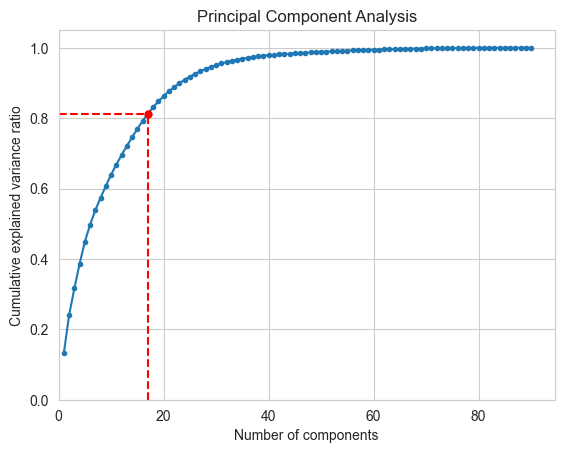

In [99]:
cum_var_ratio = model.explained_variance_ratio_.cumsum()
highlight_idx = 16
highlight_value = cum_var_ratio[highlight_idx]

plt.plot([i+1 for i in range(len(cum_var_ratio)) ],cum_var_ratio, marker = 'o', markersize = 3)
plt.vlines(highlight_idx+1, 0, highlight_value, linestyles = "dashed", color = "red")
plt.hlines(highlight_value, 0, highlight_idx+1, linestyles = "dashed", color = "red")
plt.plot(highlight_idx+1, highlight_value, marker = 'o', markersize = 5, color = "red")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.xlim(0, None)
plt.ylim(0, None)
plt.title("Principal Component Analysis")
plt.show()

In [94]:
cum_var_ratio

array([0.13358845, 0.24118479, 0.31664839, 0.38662655, 0.4493328 ,
       0.49743717, 0.53903598, 0.57404205, 0.60737554, 0.63981124,
       0.66814813, 0.69560271, 0.72105632, 0.74571526, 0.7695591 ,
       0.79223623, 0.81227152, 0.83117339, 0.84739456, 0.86233366,
       0.87644194, 0.88798757, 0.89883037, 0.90923787, 0.91796699,
       0.92570708, 0.93309097, 0.93962684, 0.94538427, 0.95050913,
       0.95531093, 0.95928692, 0.96296807, 0.96581035, 0.96854368,
       0.97118093, 0.9736603 , 0.9756601 , 0.97746144, 0.97868398,
       0.97981354, 0.98092617, 0.981999  , 0.98306381, 0.98406352,
       0.98499137, 0.98586908, 0.98672449, 0.98753955, 0.98831792,
       0.98908837, 0.98980405, 0.99046825, 0.99110762, 0.99170787,
       0.9922751 , 0.99281049, 0.99332768, 0.99381662, 0.9942946 ,
       0.99475296, 0.99517051, 0.9955663 , 0.99595775, 0.99633618,
       0.99671033, 0.99704216, 0.99735362, 0.99762746, 0.99788912,
       0.9981359 , 0.99834429, 0.99852752, 0.99870006, 0.99886

### Using 17 components contributing to 81.23% of the variance

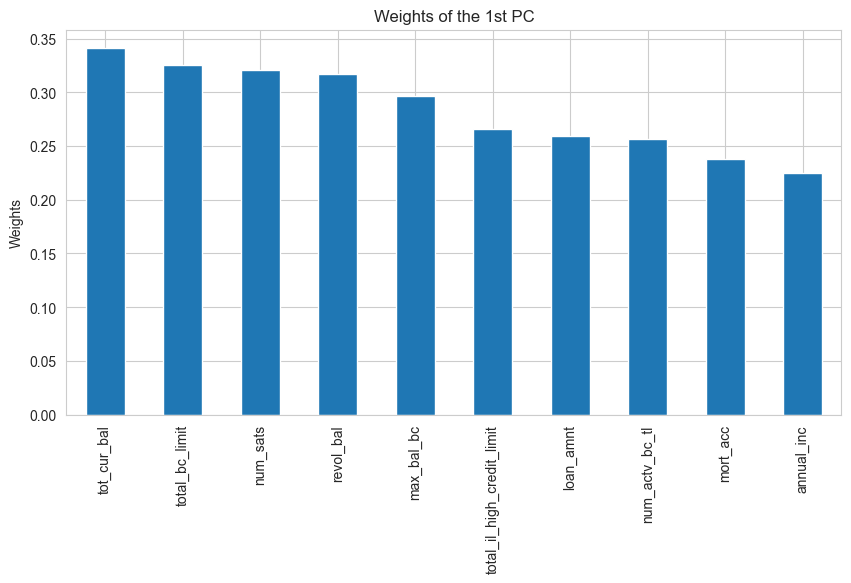

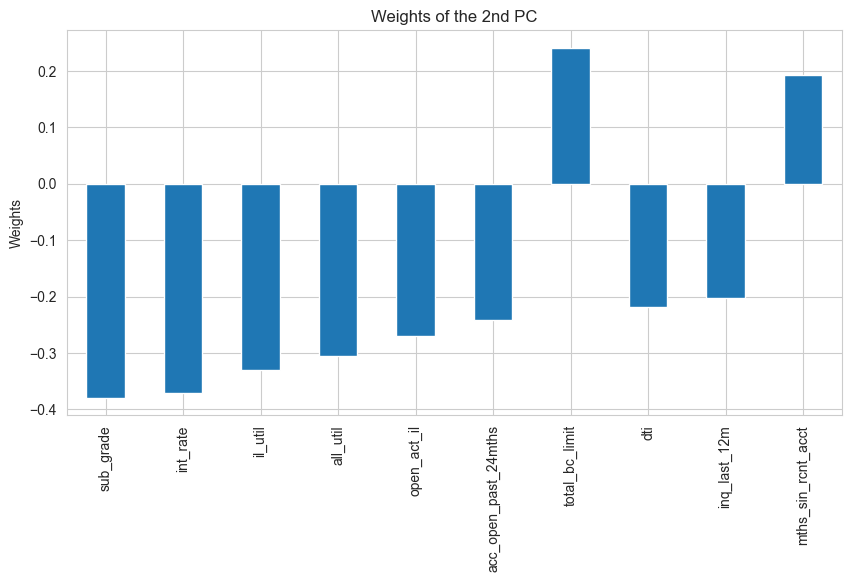

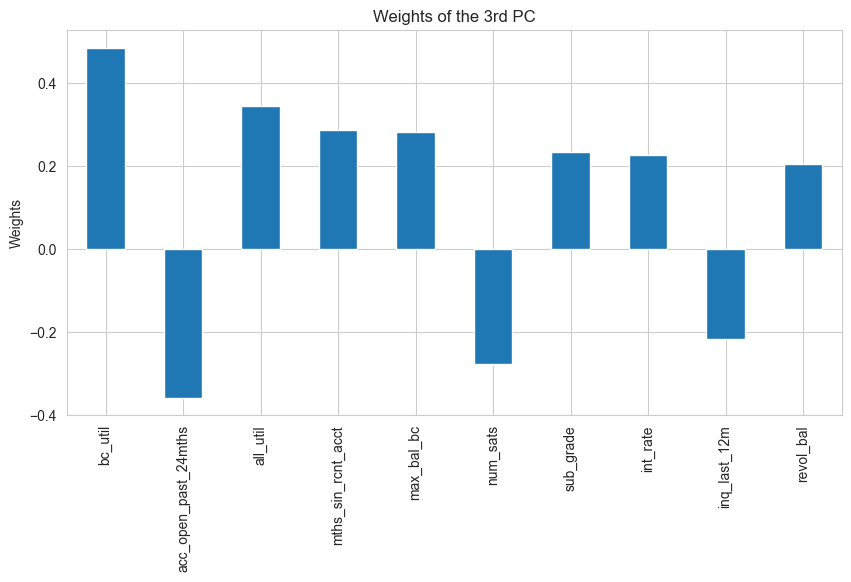

In [100]:
model = sklearn.decomposition.PCA(n_components = 17, random_state = 15)

X_train_pca = model.fit_transform(X_train)
X_test_pca = model.transform(X_test)

pd.DataFrame(X_train_pca).to_csv("X_train_pca_17comp_81var.csv", index = False)
pd.DataFrame(X_test_pca).to_csv("X_test_pca_17comp_81var.csv", index = False)

first_comp = pd.Series(model.components_[0], index = X_train.columns)
second_comp = pd.Series(model.components_[1], index = X_train.columns)
third_comp = pd.Series(model.components_[2], index = X_train.columns)

first_comp = first_comp.loc[first_comp.abs().nlargest(10).index]
second_comp = second_comp.loc[second_comp.abs().nlargest(10).index]
third_comp = third_comp.loc[third_comp.abs().nlargest(10).index]

first_comp.plot(kind = 'bar', legend = False, title = "Weights of the 1st PC", figsize = (10, 5))
plt.ylabel("Weights")
plt.show()

second_comp.plot(kind = 'bar', legend = False, title = "Weights of the 2nd PC", figsize = (10, 5))
plt.ylabel("Weights")
plt.show()

third_comp.plot(kind = 'bar', legend = False, title = "Weights of the 3rd PC", figsize = (10, 5))
plt.ylabel("Weights")
plt.show()

### Using 2 components for 2D Visualization (24.12% variance explained)

In [101]:
model = sklearn.decomposition.PCA(n_components = 2, random_state = 15)

X_train_pca = model.fit_transform(X_train)
X_test_pca = model.transform(X_test)

pd.DataFrame(X_train_pca).to_csv("X_train_pca_2comp_24var.csv", index = False)
pd.DataFrame(X_test_pca).to_csv("X_test_pca_2comp_24var.csv", index = False)

### Using 3 components for 3D Visualization (31.66% variance explained)

In [102]:
model = sklearn.decomposition.PCA(n_components = 3, random_state = 15)

X_train_pca = model.fit_transform(X_train)
X_test_pca = model.transform(X_test)

pd.DataFrame(X_train_pca).to_csv("X_train_pca_3comp_31var.csv", index = False)
pd.DataFrame(X_test_pca).to_csv("X_test_pca_3comp_31var.csv", index = False)

## Truncated Singular Value Decomposition

In [106]:
model = sklearn.decomposition.TruncatedSVD(n_components = X_train.shape[1], random_state = 15)
model.fit_transform(X_train)

array([[ 5.04815647e-02, -2.66689878e+00, -4.80444596e-01, ...,
        -3.61690255e-04, -9.98558781e-05,  2.37736811e-05],
       [ 2.08738440e+00,  2.15341415e+00, -2.63558520e+00, ...,
         4.40576897e-04, -2.22070268e-04, -1.39415446e-05],
       [ 1.17955763e+00, -1.04692218e+00,  8.28710815e-01, ...,
        -6.24157304e-05, -2.47540332e-04,  4.21634288e-05],
       ...,
       [-1.74217192e-01, -2.16192379e+00,  1.50682540e+00, ...,
         8.48657675e-04, -3.43312812e-04, -2.29059139e-05],
       [ 1.98707731e+00, -3.48668830e+00, -3.20052089e+00, ...,
         2.01449253e-03,  1.00437065e-04,  7.39625188e-05],
       [-7.71146048e-01, -1.79871709e+00,  6.83351256e-02, ...,
         7.62901305e-04,  4.86201304e-04,  7.39799517e-06]])

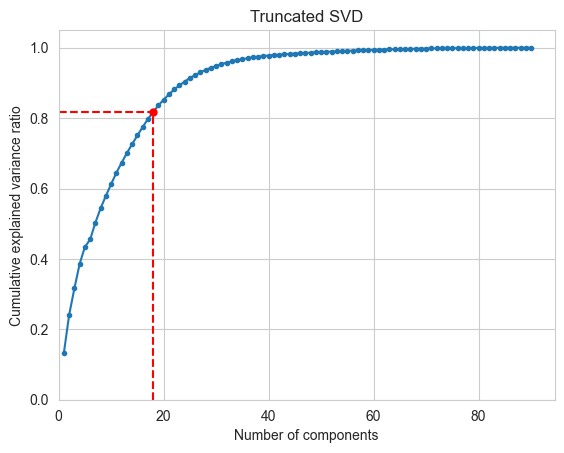

In [112]:
cum_var_ratio = model.explained_variance_ratio_.cumsum()
highlight_idx = 17
highlight_value = cum_var_ratio[highlight_idx]

plt.plot([i+1 for i in range(len(cum_var_ratio)) ],cum_var_ratio, marker = 'o', markersize = 3)
plt.vlines(highlight_idx+1, 0, highlight_value, linestyles = "dashed", color = "red")
plt.hlines(highlight_value, 0, highlight_idx+1, linestyles = "dashed", color = "red")
plt.plot(highlight_idx+1, highlight_value, marker = 'o', markersize = 5, color = "red")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.xlim(0, None)
plt.ylim(0, None)
plt.title("Truncated SVD")
plt.show()

In [111]:
cum_var_ratio

array([0.13349772, 0.24108554, 0.31623301, 0.38588896, 0.43400214,
       0.45534151, 0.50298654, 0.54425491, 0.57919194, 0.61251804,
       0.64492737, 0.6732548 , 0.70070935, 0.72614065, 0.75068887,
       0.77453139, 0.79720852, 0.81717164, 0.83607111, 0.85228887,
       0.86722773, 0.88133436, 0.89287806, 0.90367254, 0.91405942,
       0.92215409, 0.92986148, 0.93719935, 0.94297692, 0.94828023,
       0.95308551, 0.95749958, 0.96147398, 0.96466682, 0.96740541,
       0.97006774, 0.97255379, 0.97458864, 0.97641068, 0.97781179,
       0.97903418, 0.98016192, 0.98123497, 0.98230084, 0.98330335,
       0.98423152, 0.98510892, 0.98596526, 0.98681897, 0.98762677,
       0.98840507, 0.98917385, 0.98988828, 0.99055111, 0.99118755,
       0.99178734, 0.99235418, 0.99288943, 0.99340613, 0.99389457,
       0.99435296, 0.99477864, 0.99518376, 0.99557902, 0.99597039,
       0.99634832, 0.99672101, 0.99705189, 0.9973629 , 0.99763564,
       0.9978973 , 0.99814383, 0.99835174, 0.99853439, 0.99870

### Using 18 components contributing to 81.72% of the variance

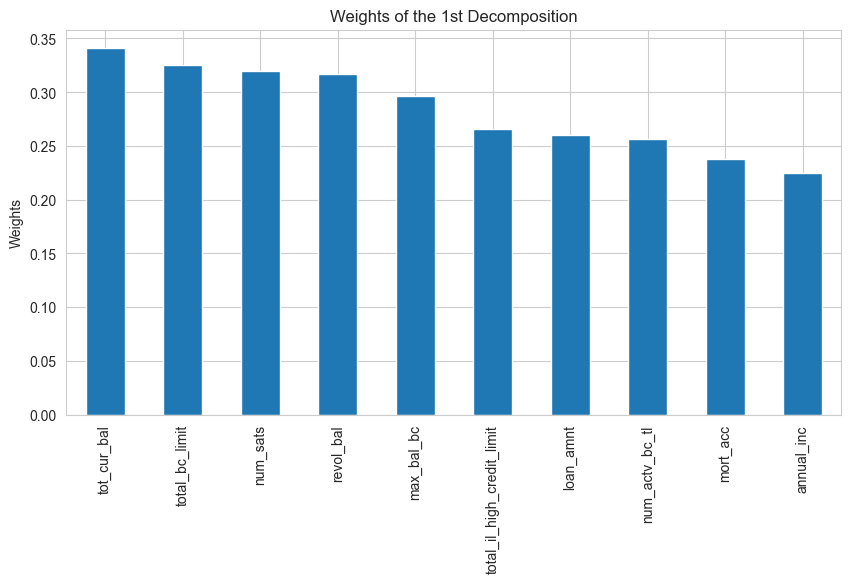

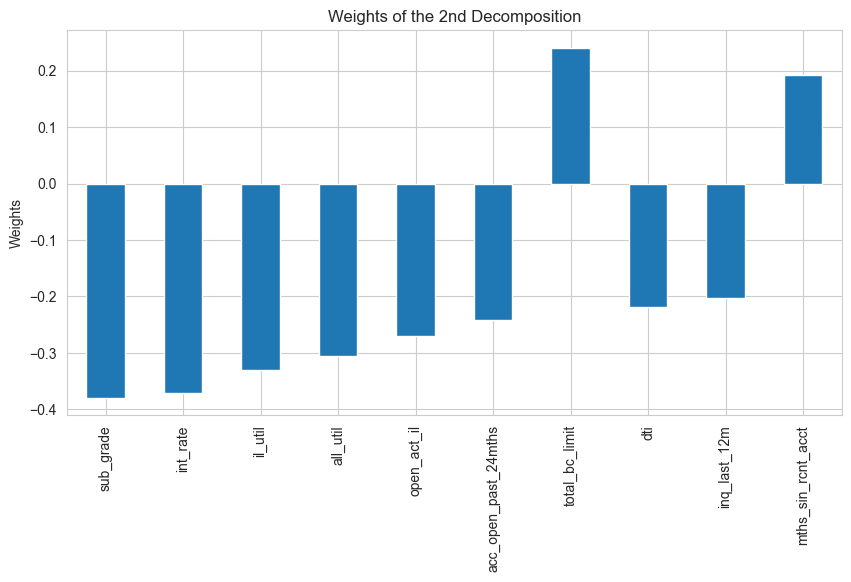

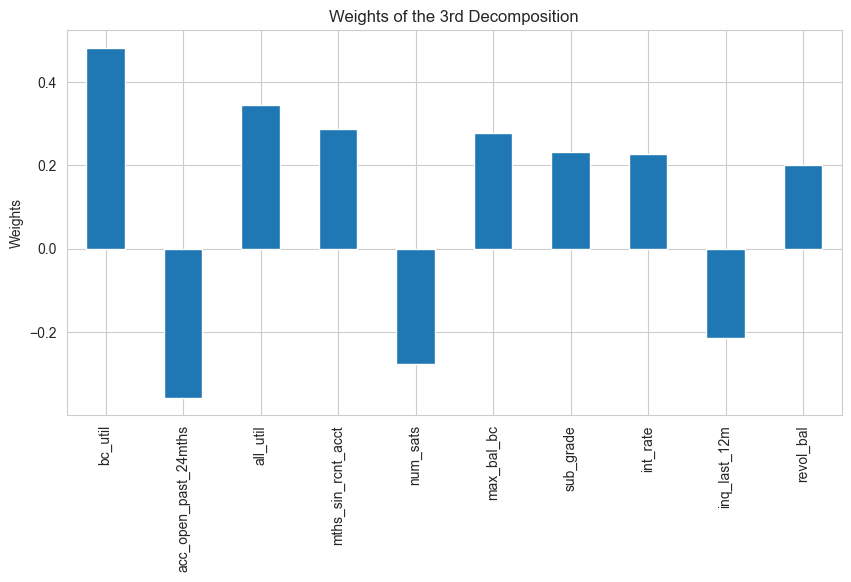

In [113]:
model = sklearn.decomposition.TruncatedSVD(n_components = 18, random_state = 15)

X_train_tsvd = model.fit_transform(X_train)
X_test_tsvd = model.transform(X_test)

pd.DataFrame(X_train_tsvd).to_csv("X_train_tsvd_18comp_81var.csv", index = False)
pd.DataFrame(X_test_tsvd).to_csv("X_test_tsvd_18comp_81var.csv", index = False)

first_comp = pd.Series(model.components_[0], index = X_train.columns)
second_comp = pd.Series(model.components_[1], index = X_train.columns)
third_comp = pd.Series(model.components_[2], index = X_train.columns)

first_comp = first_comp.loc[first_comp.abs().nlargest(10).index]
second_comp = second_comp.loc[second_comp.abs().nlargest(10).index]
third_comp = third_comp.loc[third_comp.abs().nlargest(10).index]

first_comp.plot(kind = 'bar', legend = False, title = "Weights of the 1st Decomposition", figsize = (10, 5))
plt.ylabel("Weights")
plt.show()

second_comp.plot(kind = 'bar', legend = False, title = "Weights of the 2nd Decomposition", figsize = (10, 5))
plt.ylabel("Weights")
plt.show()

third_comp.plot(kind = 'bar', legend = False, title = "Weights of the 3rd Decomposition", figsize = (10, 5))
plt.ylabel("Weights")
plt.show()

### Using 2 components for 2D Visualization (24.11% variance explained)

In [114]:
model = sklearn.decomposition.TruncatedSVD(n_components = 2, random_state = 15)

X_train_tsvd = model.fit_transform(X_train)
X_test_tsvd = model.transform(X_test)

pd.DataFrame(X_train_tsvd).to_csv("X_train_tsvd_2comp_24var.csv", index = False)
pd.DataFrame(X_test_tsvd).to_csv("X_test_tsvd_2comp_24var.csv", index = False)

### Using 3 components for 3D Visualization (31.62% variance explained)

In [115]:
model = sklearn.decomposition.TruncatedSVD(n_components = 3, random_state = 15)

X_train_tsvd = model.fit_transform(X_train)
X_test_tsvd = model.transform(X_test)

pd.DataFrame(X_train_tsvd).to_csv("X_train_tsvd_3comp_31var.csv", index = False)
pd.DataFrame(X_test_tsvd).to_csv("X_test_tsvd_3comp_31var.csv", index = False)

## T-Distributed Stochastic Neighbor Embedding for 2D Visualization

### 2D Visualization

In [83]:
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1, random_state=15, perplexity=15)
X_train_tsne = pd.DataFrame(tsne.fit_transform(X_train))
X_test_tsne = pd.DataFrame(tsne.transform(X_test))

X_train_tsne.to_csv("X_train_tsne_2D.csv", index = False)
X_test_tsne.to_csv("X_test_tsne_2D.csv", index = False)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 404291 samples in 0.152s...
[t-SNE] Computed neighbors for 404291 samples in 414.348s...
[t-SNE] Computed conditional probabilities for sample 1000 / 404291
[t-SNE] Computed conditional probabilities for sample 2000 / 404291
[t-SNE] Computed conditional probabilities for sample 3000 / 404291
[t-SNE] Computed conditional probabilities for sample 4000 / 404291
[t-SNE] Computed conditional probabilities for sample 5000 / 404291
[t-SNE] Computed conditional probabilities for sample 6000 / 404291
[t-SNE] Computed conditional probabilities for sample 7000 / 404291
[t-SNE] Computed conditional probabilities for sample 8000 / 404291
[t-SNE] Computed conditional probabilities for sample 9000 / 404291
[t-SNE] Computed conditional probabilities for sample 10000 / 404291
[t-SNE] Computed conditional probabilities for sample 11000 / 404291
[t-SNE] Computed conditional probabilities for sample 12000 / 404291
[t-SNE] Computed conditional proba

KeyboardInterrupt: 

In [ ]:
X_train_tsne

In [ ]:
X_train_tsne.to_csv("X_train_tsne_2D.csv", index = False)
X_test_tsne.to_csv("X_test_tsne_2D.csv", index = False)

### 3D Visualization

In [ ]:
tsne = sklearn.manifold.TSNE(n_components=3, verbose=1, random_state=15, perplexity=15)
X_train_tsne = pd.DataFrame(tsne.fit_transform(X_train))
X_test_tsne = pd.DataFrame(tsne.transform(X_test))

X_train_tsne.to_csv("X_train_tsne_3D.csv", index = False)
X_test_tsne.to_csv("X_test_tsne_3D.csv", index = False)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 404291 samples in 0.152s...


## Using only the result from PCA on Logistic Regression

In [117]:
train = pd.read_csv("./Data/train_vs1.csv")
test = pd.read_csv("./Data/test_vs1.csv")

scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")

_, y_train = transform_features(train, encoder, scaler, feature_importance= True)
_, y_test = transform_features(test, encoder, scaler, train = False, feature_importance = True)

In [118]:
X_train = pd.read_csv("X_train_pca_17comp_81var.csv")
X_test = pd.read_csv("X_test_pca_17comp_81var.csv")

In [119]:
print(X_train.shape, y_train.shape)

(404291, 17) (404291, 1)


### Vanilla Logistic Regression

In [121]:
model = sklearn.linear_model.LogisticRegression(penalty= None,
                                                random_state= 15, 
                                                solver = 'saga',
                                                max_iter = 10000, 
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc", "accuracy", "balanced_accuracy", "f1_weighted", "f1_macro"], 
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

In [122]:
cv_results

{'fit_time': array([3.14711142, 3.44854069, 2.27949047, 2.0787437 , 2.06777692,
        2.16633797, 1.86879373, 2.01805234, 3.13063478, 1.95019269]),
 'score_time': array([0.73093939, 0.70015812, 0.53855419, 0.53599644, 0.53179812,
        0.53112054, 0.53040314, 0.53512192, 0.5351212 , 0.54848623]),
 'estimator': [LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=15,
                     solver='saga', tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-

### Adjusting class weight for imbalance learning

In [123]:
model = sklearn.linear_model.LogisticRegression(class_weight = 'balanced',
                                                random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results_cw = sklearn.model_selection.cross_validate(model,
                                                    X_train.values, 
                                                    y_train.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc",
                                                               "accuracy",
                                                               "balanced_accuracy",
                                                               "f1_weighted",
                                                               "f1_macro"
                                                               ], 
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

cv_results_cw

{'fit_time': array([2.1480515 , 2.44621587, 2.43955946, 2.07752061, 2.19782209,
        2.42789721, 2.37826562, 2.13340282, 2.12604022, 2.03695416]),
 'score_time': array([0.54400253, 0.54612446, 0.55480719, 0.54312277, 0.53283095,
        0.53912187, 0.57789016, 0.53463221, 0.52911997, 0.53397322]),
 'estimator': [LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1,
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1,
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1,
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1,
                     random_state=15, solver='saga', tol=0.0005),
  LogisticRegression(class_weight='balanced', max_iter=10000, n_jobs=-1,
                     random_state=15, solver='saga', tol

### Random oversampling

In [128]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop = "first", handle_unknown = "ignore")
ros = imblearn.over_sampling.RandomOverSampler(sampling_strategy = 0.8, random_state = 15)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model = sklearn.linear_model.LogisticRegression(random_state= 15,
                                                solver = 'saga',
                                                max_iter = 10000,
                                                tol = 5e-4,
                                                n_jobs = -1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 15)

cv_results_ros = sklearn.model_selection.cross_validate(model,
                                                    X_train_ros.values, 
                                                    y_train_ros.values.ravel(), 
                                                    cv = skf, 
                                                    scoring = ["roc_auc",
                                                               "accuracy",
                                                               "balanced_accuracy",
                                                               "f1_weighted",
                                                               "f1_macro"
                                                               ],
                                                    return_train_score= True, 
                                                    return_estimator= True, 
                                                    return_indices= True)

cv_results_ros

{'fit_time': array([4.863518  , 3.47328568, 4.40864062, 5.97978115, 3.69446945,
        3.05849004, 3.14449334, 3.63146305, 3.11554193, 3.33682585]),
 'score_time': array([1.40293455, 1.03123379, 0.82951951, 0.77550983, 0.83018756,
        0.75617051, 0.76517296, 0.77228427, 0.79317951, 0.76217246]),
 'estimator': [LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
 

### Random undersampling

In [129]:
scaler = sklearn.preprocessing.StandardScaler()
encoder = sklearn.preprocessing.OneHotEncoder(drop="first", handle_unknown="ignore")
rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.8, random_state=15)

X_train_rus, y_train_rus = ros.fit_resample(X_train, y_train)

model = sklearn.linear_model.LogisticRegression(random_state=15,
                                                solver='saga',
                                                max_iter=10000,
                                                tol=5e-4,
                                                n_jobs=-1
                                                )

skf = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

cv_results_rus = sklearn.model_selection.cross_validate(model,
                                                    X_train_rus.values,
                                                    y_train_rus.values.ravel(),
                                                    cv=skf,
                                                    scoring = ["roc_auc",
                                                               "accuracy",
                                                               "balanced_accuracy",
                                                               "f1_weighted",
                                                               "f1_macro"
                                                               ],
                                                    return_train_score=True,
                                                    return_estimator=True,
                                                    return_indices=True)
cv_results_rus

{'fit_time': array([3.0369668 , 3.26309466, 3.49398971, 3.26842976, 3.31163287,
        3.08197212, 3.04081821, 3.25985456, 3.03503156, 3.32169247]),
 'score_time': array([0.77687788, 0.75877976, 0.7636795 , 0.75871181, 0.7651732 ,
        0.75817132, 0.75854206, 0.75921869, 0.75833559, 0.78417325]),
 'estimator': [LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
  LogisticRegression(max_iter=10000, n_jobs=-1, random_state=15, solver='saga',
                     tol=0.0005),
 

### Evaluations

In [126]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.5298743891218012
Classification report:                precision    recall  f1-score   support

           0       0.87      0.97      0.92     36768
           1       0.35      0.09      0.14      6003

    accuracy                           0.85     42771
   macro avg       0.61      0.53      0.53     42771
weighted avg       0.80      0.85      0.81     42771

Confusion Matrix:  [[35835   933]
 [ 5492   511]]
ROC AUC:  0.6980175735674372


In [127]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_cw["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.6413137602760848
Classification report:                precision    recall  f1-score   support

           0       0.91      0.68      0.78     36768
           1       0.23      0.60      0.34      6003

    accuracy                           0.67     42771
   macro avg       0.57      0.64      0.56     42771
weighted avg       0.82      0.67      0.72     42771

Confusion Matrix:  [[24969 11799]
 [ 2380  3623]]
ROC AUC:  0.6968939241214902


In [130]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_ros["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.6279263341023136
Classification report:                precision    recall  f1-score   support

           0       0.90      0.76      0.83     36768
           1       0.25      0.49      0.34      6003

    accuracy                           0.73     42771
   macro avg       0.58      0.63      0.58     42771
weighted avg       0.81      0.73      0.76     42771

Confusion Matrix:  [[28125  8643]
 [ 3056  2947]]
ROC AUC:  0.6974248044240137


In [131]:
balanced_accuracy, roc_auc, cm, report = evaluate_model(cv_results_rus["estimator"][0],
                                                        X_test.values,
                                                        y_test.values.ravel())

Balanced Accuracy:  0.6279263341023136
Classification report:                precision    recall  f1-score   support

           0       0.90      0.76      0.83     36768
           1       0.25      0.49      0.34      6003

    accuracy                           0.73     42771
   macro avg       0.58      0.63      0.58     42771
weighted avg       0.81      0.73      0.76     42771

Confusion Matrix:  [[28125  8643]
 [ 3056  2947]]
ROC AUC:  0.6974248044240137
